<a href="https://colab.research.google.com/github/jimmyQuigeeAnalytics/Unsupervised-Learning/blob/main/Economic_and_Health_Segmentation_Using_Gaussian_Mixture_Model_(GMM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analysis of Global Development Patterns through Socio-economic and Health Clustering

#### Objective:
The primary objective of this case study is to utilize a Gaussian Mixture Model (GMM) to cluster countries based on various socio-economic and health indicators. The aim is to identify patterns that could inform targeted international aid, policy making, and investment strategies, focusing on improving child mortality rates, income levels, health services, and overall quality of life.

#### Data:
The dataset contains information on various countries, including:
- Child mortality rates
- Exports as a percentage of GDP
- Health spending as a percentage of GDP
- Imports as a percentage of GDP
- Per capita income
- Inflation rates
- Life expectancy
- Fertility rates
- GDP per capita

#### Methodology:
1. **Data Preprocessing**:
   - Assess and clean the dataset, ensuring no missing values and normalized data for accurate analysis.
   - Exclude the `country` column from clustering but use it for labeling and analysis purposes.

2. **Cluster Analysis Using GMM**:
   - Use Gaussian Mixture Models for clustering to leverage the model’s ability to handle data that involves different covariance structures.
   - Determine the optimal number of clusters by evaluating the Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC).

3. **Statistical Analysis and Visualization**:
   - Perform statistical analysis to characterize each cluster (mean, median, range).
   - Visualize distributions of variables within clusters to highlight differences and similarities.

4. **Interpretation and Discussion**:
   - Discuss the characteristics of each cluster, identifying what socio-economic and health factors contribute to their categorization.
   - Identify outliers or unusual patterns within clusters.

5. **Policy and Aid Recommendations**:
   - Based on the clustering, suggest specific areas where policy intervention or aid could be most effective.
   - Propose strategies for international development organizations to target resources efficiently.

6. **Validation and Sensitivity Analysis**:
   - Validate the robustness of the clustering by comparing results with known benchmarks or through stability testing (e.g., using different subsets of the data).
   - Conduct sensitivity analysis to see how changes in the input variables affect the clustering outcome.

#### Expected Outcomes:
- Identification of clusters that indicate different levels of development and their respective challenges and strengths.
- Detailed profiles for each cluster that could guide targeted interventions.
- Policy and investment insights that could lead to significant improvements in global health and economic status.

#### Potential Impact:
This case study can significantly impact how international aid and policies are designed and implemented, ensuring that resources are allocated efficiently to improve global welfare effectively.

#### Audience:
This case study would be beneficial for:
- International development organizations
- Government policymakers
- Economic and healthcare researchers
- NGOs focusing on global development

### Step 1: Data Preprocessing
Before applying any machine learning model, it's crucial to prepare the data to ensure it's clean and appropriately formatted for the analysis. This includes checking for missing values and normalizing the data to ensure that all features contribute equally during clustering.

In [27]:
import pandas as pd

# Load the data to see the first few rows and understand its structure
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [28]:
data.shape

(167, 10)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### 1.1 Check for Missing Values
We need to ensure there are no missing values in our dataset which could affect the model's performance.

In [30]:
# Check for missing values in the dataset
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### 1.2 Normalize the Data
We'll normalize the numerical data to prevent features with larger scale from dominating the model.

In [31]:
from sklearn.preprocessing import StandardScaler

# Extracting numerical columns for scaling
numerical_data = data.drop('country', axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(numerical_data)

# Create a DataFrame of the scaled data
scaled_data_df = pd.DataFrame(scaled_data, columns=numerical_data.columns)

Let's execute these preprocessing steps in the Python environment.

The data has been successfully preprocessed:
- **No missing values** were found in the dataset, which is excellent as it allows us to proceed without handling missing data.
- **Normalization** was applied to the numerical features, ensuring that each feature contributes equally to the analysis and isn't biased by the scale of the data.

### Step 2: Determining the Optimal Number of Clusters
To effectively use Gaussian Mixture Models (GMM) for clustering, we first need to decide on the number of clusters. This is typically done by evaluating the Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC) across different cluster numbers. These criteria help in selecting a model that balances the goodness of fit with the complexity.

We will calculate the BIC and AIC for a range of potential cluster numbers and plot these metrics to identify the optimal number of clusters.

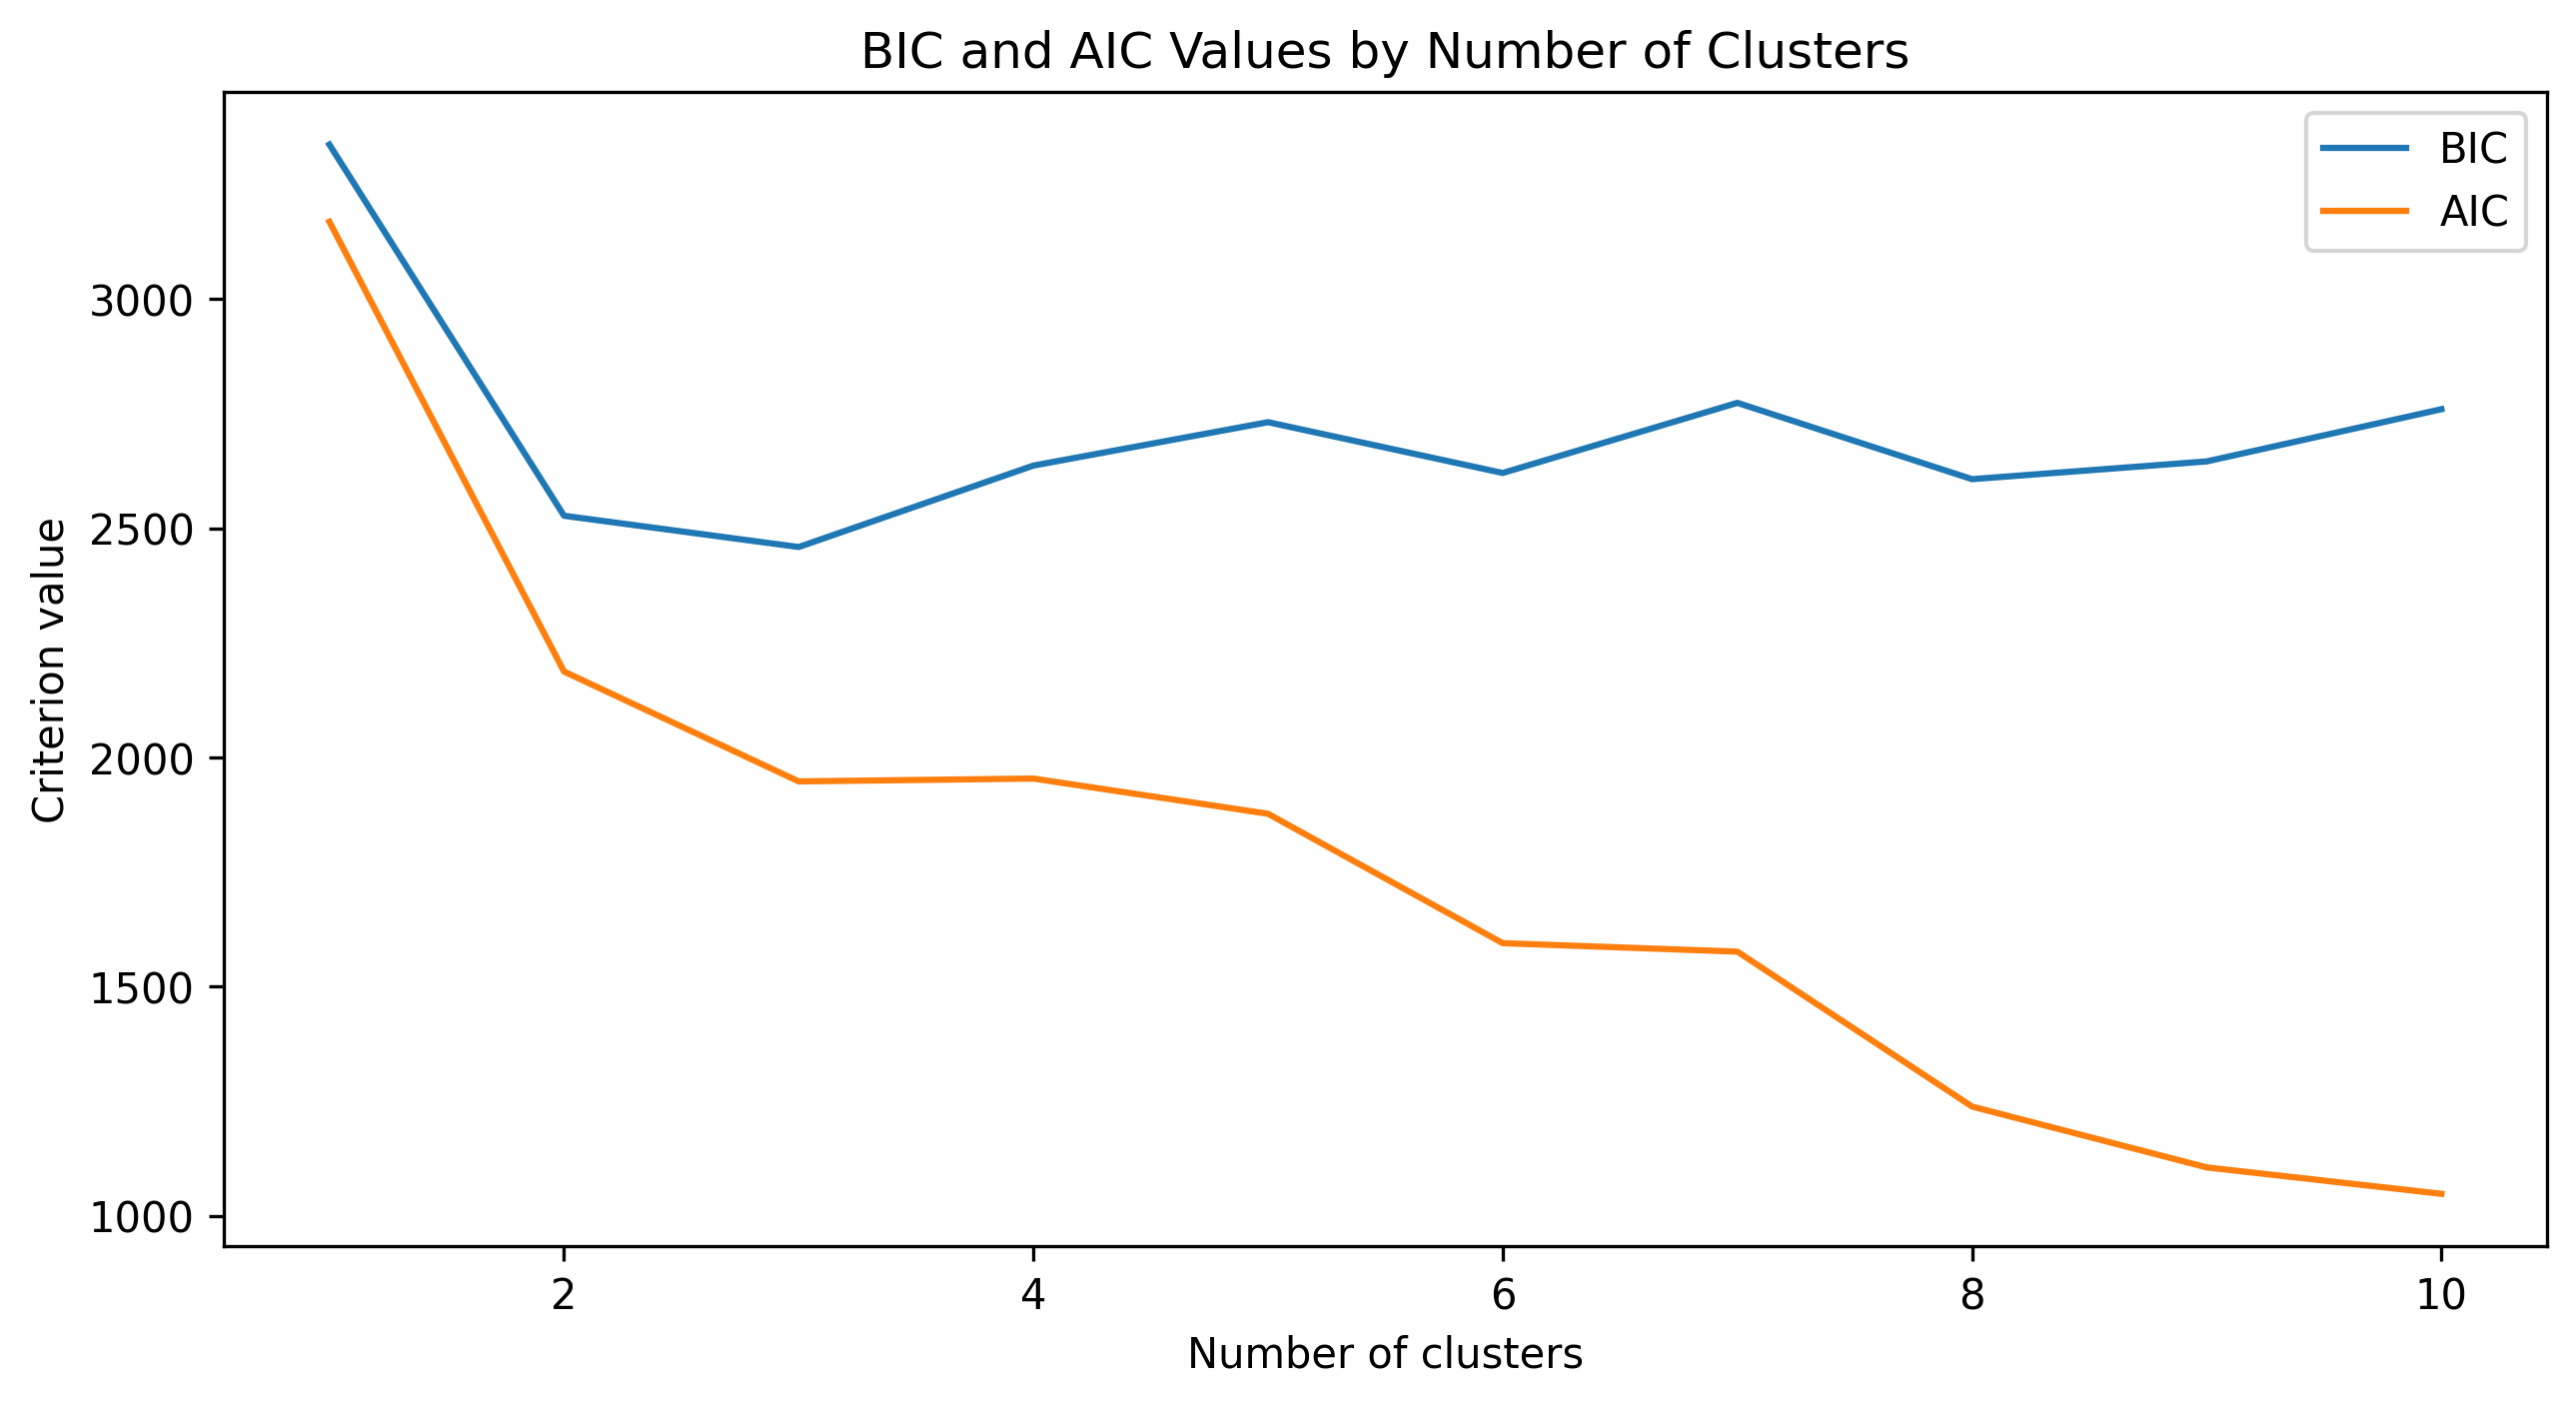

In [32]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Determine the range of potential cluster counts to examine
cluster_options = np.arange(1, 11)  # Testing 1 to 10 clusters

# Initialize lists to store BIC and AIC values
bics = []
aics = []

# Compute BIC and AIC for each number of clusters
for n_clusters in cluster_options:
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(scaled_data_df)
    bics.append(gmm.bic(scaled_data_df))
    aics.append(gmm.aic(scaled_data_df))

# Plotting the BIC and AIC values
plt.figure(figsize=(10, 5),dpi=300)
plt.plot(cluster_options, bics, label='BIC')
plt.plot(cluster_options, aics, label='AIC')
plt.xlabel('Number of clusters')
plt.ylabel('Criterion value')
plt.title('BIC and AIC Values by Number of Clusters')
plt.legend()
plt.show()

The plot of the Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC) versus the number of clusters suggests that both criteria reach a low point and then plateau as the number of clusters increases. Typically, the optimal number of clusters is chosen at the point where the BIC/AIC values start to level off, known as the "elbow" method.

From the graph, there seems to be an elbow at around 2-4 clusters for both BIC and AIC. Choosing too few clusters might oversimplify the model, while too many might overfit. Given this, let's proceed with 3 clusters for our Gaussian Mixture Model to balance complexity and model fit.

### Step 3: Building the Gaussian Mixture Model
With the optimal number of clusters identified as 3, we'll now fit the Gaussian Mixture Model using this number of components. After fitting, we'll analyze the cluster assignments to understand the characteristics of each group.

This step will give us insight into how the countries are grouped based on their socio-economic and health characteristics. Let's proceed with this analysis.

In [33]:
# Assuming 'data' is your original DataFrame and it includes the 'country' column
# Exclude the 'country' column from the dataset used for clustering
numeric_data = data.drop('country', axis=1)

# Optionally, check that the DataFrame contains only numeric columns
numeric_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [34]:
# Now proceed with scaling (if not already done)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(scaled_data)

# Predict the clusters
cluster_labels = gmm.predict(scaled_data)

# Add cluster labels back to the original DataFrame for analysis
data['Cluster'] = cluster_labels
print(data[['country', 'Cluster']].head())

               country  Cluster
0          Afghanistan        1
1              Albania        2
2              Algeria        2
3               Angola        1
4  Antigua and Barbuda        2


Visualizing the clusters can give you an intuitive understanding of how your data is grouped. Since we're dealing with multidimensional data, we can use techniques like Principal Component Analysis (PCA) to reduce the dimensionality to two or three dimensions for visualization. Here’s how you can do it:

#### Step 1: Dimensionality Reduction
First, we'll apply PCA to reduce the dimensions of our scaled data to two principal components. This will allow us to plot the data on a 2D scatter plot.

#### Step 2: Plotting the Clusters
We'll then create a scatter plot of the two principal components, coloring the data points according to their cluster labels to visualize the separation between clusters.

Here's the complete code to perform these steps:

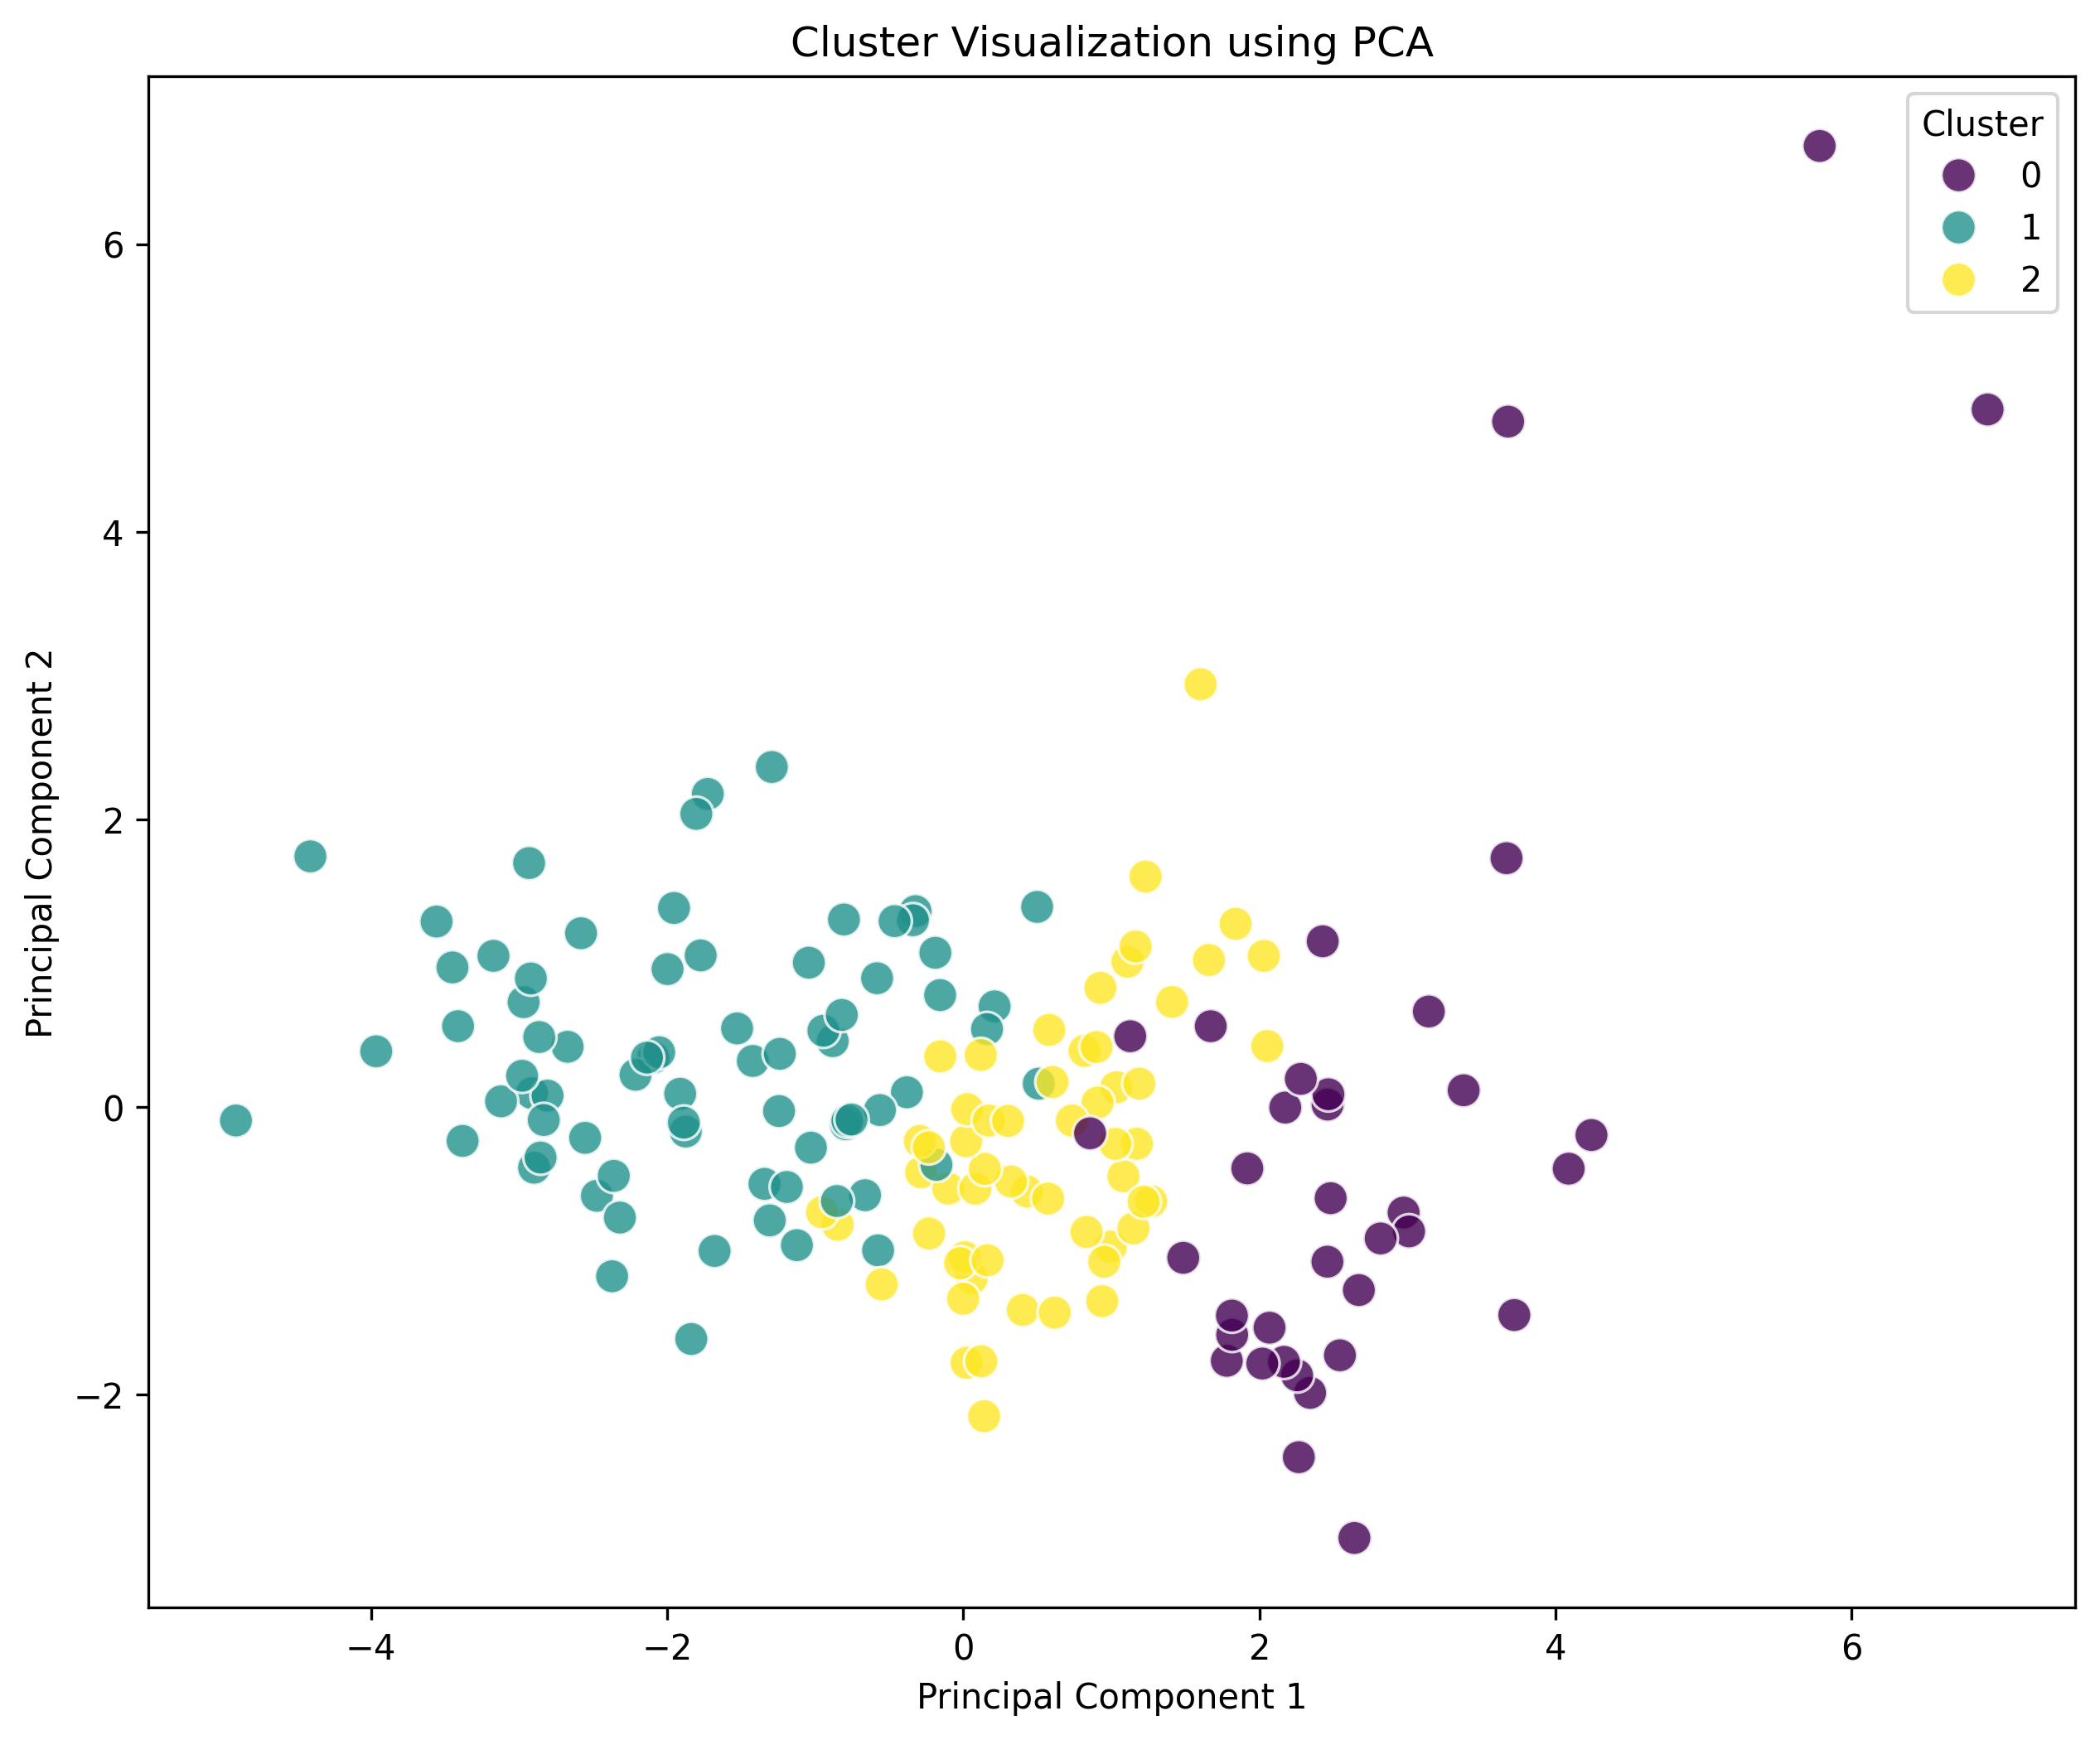

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Dimensionality Reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels  # Add the cluster labels from the GMM

# Step 2: Plotting the Clusters
plt.figure(figsize=(10, 8),dpi=300)
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.8)
plt.title('Cluster Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

The Gaussian Mixture Model with 3 clusters has provided the following insights into how the countries are grouped based on their socio-economic and health characteristics:

### Cluster Analysis Summary:

#### Cluster 0: High-Income Countries
- **Child Mortality**: Very low (average 5.47 per 1000 births)
- **Income**: Very high (average \$46,706)
- **Life Expectancy**: Very high (average 80.1 years)
- **GDP Per Capita**: Very high (average \$42,556)
- **Exports and Imports**: High as a percentage of GDP
- **Health Spending**: High (average 8.54% of GDP)

#### Cluster 1: Low-Income Countries
- **Child Mortality**: High (average 71.92 per 1000 births)
- **Income**: Low (average \$4,503)
- **Life Expectancy**: Low (average 62.7 years)
- **GDP Per Capita**: Very low (average \$2,087)
- **Exports and Imports**: Lower as a percentage of GDP
- **Health Spending**: Lower (average 6.18% of GDP)

#### Cluster 2: Middle-Income Countries
- **Child Mortality**: Moderate (average 15.29 per 1000 births)
- **Income**: Moderate (average \$14,886)
- **Life Expectancy**: High (average 74.7 years)
- **GDP Per Capita**: Moderate (average \$8,396)
- **Exports and Imports**: Moderate as a percentage of GDP
- **Health Spending**: Comparable to low-income countries (average 6.55% of GDP)

### Findings and Implications:
- **Cluster 0** (High-Income Countries) countries are well-developed with robust economies and healthcare systems, suggesting lower need for aid but potential as trade and investment partners.
- **Cluster 1** (Low-Income Countries) countries likely require significant international aid and intervention to improve healthcare, education, and economic development to reduce child mortality and increase life expectancy.
- **Cluster 2** (Middle-Income Countries) countries are developing but better off than those in Cluster 1, and might benefit from targeted development programs aimed at boosting economic growth and healthcare infrastructure.

This clustering can help in tailoring international aid, economic policies, and health initiatives to the specific needs of these groups of countries.

This approach not only provides a deep dive into the socio-economic and health conditions of various countries but also offers actionable insights that can be tailored to different regions based on specific needs identified through clustering.